In [1]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**Importing the dataset**

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.drop('User ID', axis=1, inplace=True)

In [5]:
df.shape

(400, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('Purchased', axis=1)
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)


**Feature Scaling**

In [9]:
from sklearn.preprocessing import StandardScaler

scale_features= ['Age','EstimatedSalary']
for feature in scale_features:
    scaler = StandardScaler()
    scaler.fit(X_train[[feature]])
    X_train[feature] = scaler.transform(X_train[[feature]])
    X_test[feature] = scaler.transform(X_test[[feature]])


**Fitting Decision Tree Classification to the Training set**

In [10]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train)


SVC()

**Predicting the Test set results**

In [11]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

**Making the Confusion Matrix**

In [12]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
tn, fp, fn, tp

(55, 3, 1, 21)

**Visualising the Training set results**

In [13]:
from sklearn.metrics import roc_curve

def auroc_plot(y_true, y_pred):
    fpr, tpr, treshold = roc_curve(y_true, y_pred, pos_label=1)\

    random_probs = [0 for i in range(len(y_true))]
    r_fpr, r_tpr, _ = roc_curve(y_true, random_probs, pos_label=1)

    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr, tpr, linestyle='--',color='green', label='DecisionTree')
    plt.plot(r_fpr, r_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')

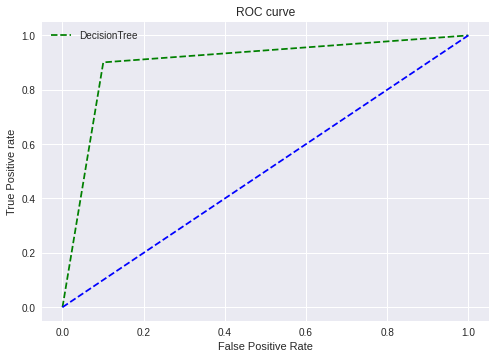

In [14]:
auroc_plot(y_train ,clf.predict(X_train))

**Visualising the Test set results**

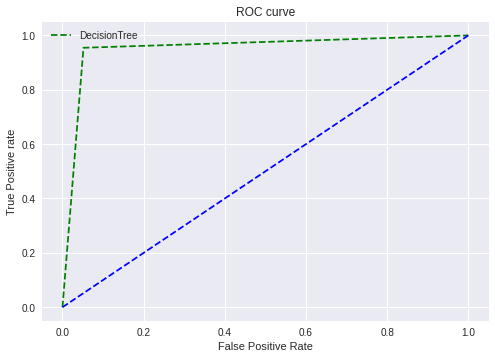

In [15]:
auroc_plot(y_test ,y_pred)